## About the dataset

In [1]:
# import libraries needed
from scipy import stats
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
bank_dataset = pd.read_csv('dataset_bank_marketing.csv', low_memory=False)

In [3]:
# Get first view about the data
bank_dataset.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,NaN,yes,no,NaN,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29.0,yes,no,NaN,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2.0,yes,yes,NaN,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,NaN,no,1506.0,yes,no,NaN,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,NaN,no,1.0,no,no,NaN,5,may,198,1,-1,0,unknown,no


In [4]:
bank_dataset.shape

(45211, 17)

In [5]:
bank_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        45211 non-null  int64  
 1   job        45211 non-null  object 
 2   marital    45211 non-null  object 
 3   education  43354 non-null  object 
 4   default    45211 non-null  object 
 5   balance    42313 non-null  float64
 6   housing    45211 non-null  object 
 7   loan       45211 non-null  object 
 8   contact    32191 non-null  object 
 9   day        45211 non-null  int64  
 10  month      45211 non-null  object 
 11  duration   45211 non-null  int64  
 12  campaign   45211 non-null  int64  
 13  pdays      45211 non-null  int64  
 14  previous   45211 non-null  int64  
 15  poutcome   45211 non-null  object 
 16  y          45211 non-null  object 
dtypes: float64(1), int64(6), object(10)
memory usage: 5.9+ MB


In [6]:
bank_dataset.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,42313.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1287.681989,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3132.224623,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,55.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,385.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1135.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


## Handling null values

In [7]:
# Checking null value in the dataset
bank_dataset.isnull().sum(axis = 0)

age              0
job              0
marital          0
education     1857
default          0
balance       2898
housing          0
loan             0
contact      13020
day              0
month            0
duration         0
campaign         0
pdays            0
previous         0
poutcome         0
y                0
dtype: int64

In [8]:
# Check unique value of the null valued columns; Education
print("Education's unique value : ")
print(bank_dataset['education'].unique())

Education's unique value : 
['tertiary' 'secondary' nan 'primary']


In [9]:
# Change "education" column NaN value with "unknown"
bank_dataset['education'].fillna("unknown", inplace = True)

In [10]:
# Change "balance" column null value with mode value of the column
# Fill it with mode => most people's amount of balance in their bank account
bank_dataset['balance'].fillna(bank_dataset['balance'].mode()[0], inplace = True)

# Re-check the null values
print(bank_dataset['education'].unique())


['tertiary' 'secondary' 'unknown' 'primary']


In [11]:
# Check unique value of the null valued columns; Contact
print("Contact's unique value : ")
print(bank_dataset['contact'].unique())

Contact's unique value : 
[nan 'cellular' 'telephone']


In [12]:
# Change "contact" column NaN value with "unknown"
bank_dataset['contact'].fillna("unknown", inplace = True)

# Re-check the null values
print(bank_dataset['contact'].unique())

['unknown' 'cellular' 'telephone']


In [13]:
# Re-check null value in the dataset after being fixed
bank_dataset.isnull().sum(axis = 0)

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

## Handling duplicated and mistyped values

In [14]:
bank_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        45211 non-null  int64  
 1   job        45211 non-null  object 
 2   marital    45211 non-null  object 
 3   education  45211 non-null  object 
 4   default    45211 non-null  object 
 5   balance    45211 non-null  float64
 6   housing    45211 non-null  object 
 7   loan       45211 non-null  object 
 8   contact    45211 non-null  object 
 9   day        45211 non-null  int64  
 10  month      45211 non-null  object 
 11  duration   45211 non-null  int64  
 12  campaign   45211 non-null  int64  
 13  pdays      45211 non-null  int64  
 14  previous   45211 non-null  int64  
 15  poutcome   45211 non-null  object 
 16  y          45211 non-null  object 
dtypes: float64(1), int64(6), object(10)
memory usage: 5.9+ MB


In [15]:
# Check for duplicated rows
bank_dataset.duplicated(keep=False).sum()

0

### Job

In [16]:
# Check mistyped value only with the "object" type columns
print(bank_dataset['job'].unique())

['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'administrator' 'self-employed' 'admin'
 'unemployed' 'housemaid' 'student']


In [17]:
# Found similar jobs : admin. admin and administrator
# Change admin. and administrator to "admin"
bank_dataset['job'] = bank_dataset['job'].replace(['admin.', 'administrator'], 'admin')


In [18]:
print(bank_dataset['job'].unique())

['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']


### Marital

In [19]:
# Check mistyped value only with the "object" type columns
print(bank_dataset['marital'].unique())

['married' 'single' 'divorced' '2023' '-1' 'blue-collar' 'may' 'november'
 'february' 'march' '-122' '135' '2016' '1293' 'management' '675' 'yes'
 'student' 'no' '366' '1997' 'housemaid']


Asumptions : 
- The people who answered "Yes" are married. Hence, going to change it to "married". 
- And the people who answered "No" are single. Hence, going to change it to "single".

In [20]:
bank_dataset['marital'] = bank_dataset['marital'].replace('yes', 'married')
bank_dataset['marital'] = bank_dataset['marital'].replace('no', 'single')

In [21]:
# Re-check the values that are just being changed
print(bank_dataset['marital'].unique())

['married' 'single' 'divorced' '2023' '-1' 'blue-collar' 'may' 'november'
 'february' 'march' '-122' '135' '2016' '1293' 'management' '675'
 'student' '366' '1997' 'housemaid']


In [22]:
# Change the values that are not either "married", "single", or "divorced", into "unknown"
bank_dataset.loc[~bank_dataset['marital'].isin(["married", "single", "divorced"]), 'marital'] = "unknown"

# Re-check unique values
print(bank_dataset['marital'].unique())

['married' 'single' 'divorced' 'unknown']


### Other object typed columns

In [23]:
# Check mistyped value only with the "object" type columns
print(bank_dataset['default'].unique())
print(bank_dataset['housing'].unique())
print(bank_dataset['month'].unique())
print(bank_dataset['poutcome'].unique())
print(bank_dataset['y'].unique())

['no' 'yes']
['yes' 'no']
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
['unknown' 'failure' 'other' 'success']
['no' 'yes']


## Handling Outliers
Check for outliers on the numeric columns

In [24]:
bank_dataset_copy = bank_dataset.copy()
num_col = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
dataset_num = bank_dataset_copy[num_col]

In [25]:
Q1 = dataset_num.quantile(0.25)
Q3 = dataset_num.quantile(0.75)
IQR = Q3 - Q1

def check_outliers(df):
    outliers = ((dataset_num < (Q1 - 1.5 * IQR)) | (dataset_num > (Q3 + 1.5 * IQR))).sum()
    percent = outliers / len(df)

    outliers_data = pd.concat([outliers, percent], axis=1, keys=['Total Outliers', 'Percent'])
    print(outliers_data[outliers_data['Total Outliers'] > 0])

check_outliers(dataset_num)

          Total Outliers   Percent
age                  487  0.010772
balance             5652  0.125014
duration            3235  0.071553
campaign            3064  0.067771
pdays               8257  0.182633
previous            8257  0.182633


array([[<AxesSubplot: title={'center': 'age'}>,
        <AxesSubplot: title={'center': 'balance'}>,
        <AxesSubplot: title={'center': 'day'}>],
       [<AxesSubplot: title={'center': 'duration'}>,
        <AxesSubplot: title={'center': 'campaign'}>,
        <AxesSubplot: title={'center': 'pdays'}>],
       [<AxesSubplot: title={'center': 'previous'}>, <AxesSubplot: >,
        <AxesSubplot: >]], dtype=object)

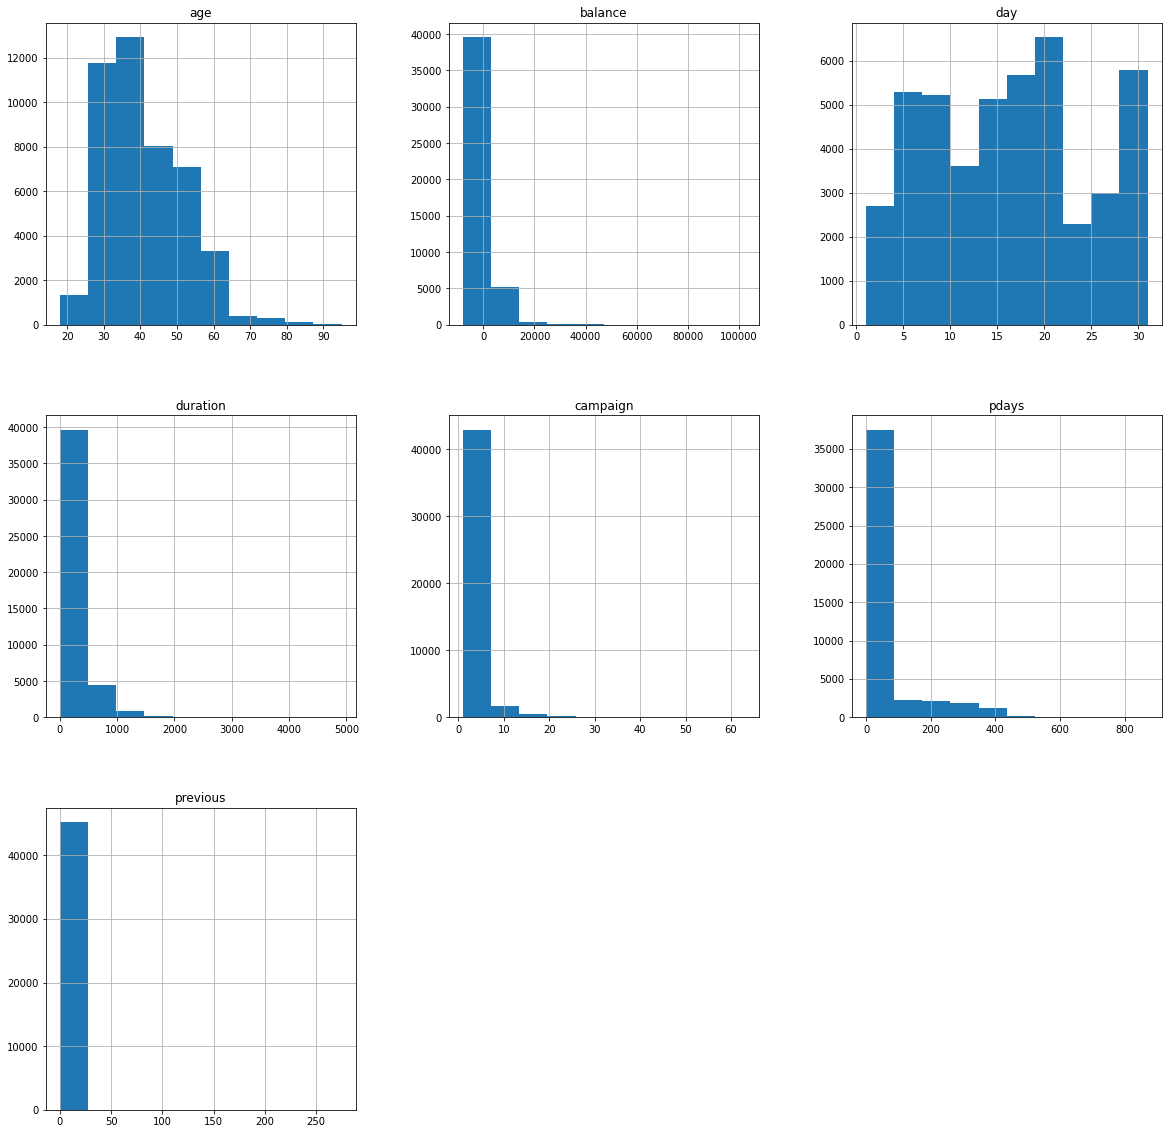

In [26]:
pd.DataFrame(dataset_num).hist(figsize=(20,20))

<function matplotlib.pyplot.show(close=None, block=None)>

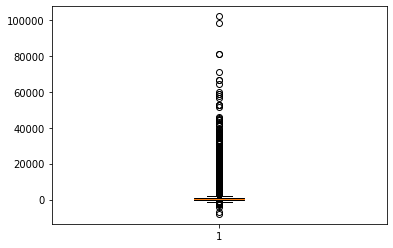

In [27]:
fig = plt.figure()
plt.boxplot(bank_dataset['balance'])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

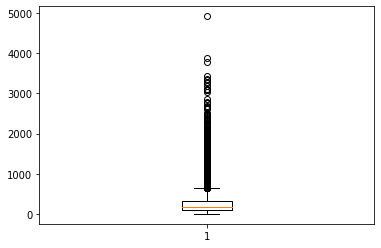

In [28]:
fig = plt.figure()
plt.boxplot(bank_dataset['duration'])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

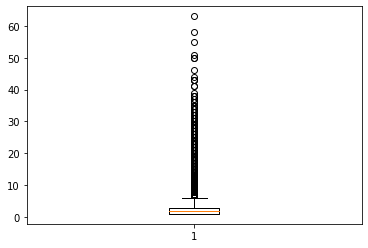

In [29]:
fig = plt.figure()
plt.boxplot(bank_dataset['campaign'])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

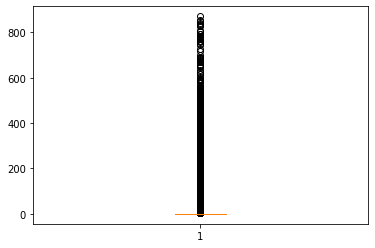

In [30]:
fig = plt.figure()
plt.boxplot(bank_dataset['pdays'])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

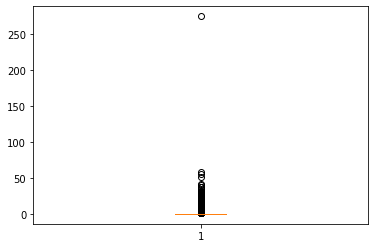

In [31]:
fig = plt.figure()
plt.boxplot(bank_dataset['previous'])
plt.show

### Clear the outliers

In [32]:
bank_dataset.shape

(45211, 17)

In [33]:
# Clear outlier data from dataset
bank_dataset_copy = bank_dataset.copy()

bank_dataset_copy = bank_dataset_copy[~((bank_dataset_copy < (Q1 - 1.5 * IQR)) |(bank_dataset_copy > (Q3 + 1.5 * IQR))).any(axis=1)]
bank_dataset_copy.shape

/var/folders/2n/4_xt4l6521375my_70gm6h2c0000gn/T/ipykernel_1449/2869997506.py:4: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  bank_dataset_copy = bank_dataset_copy[~((bank_dataset_copy < (Q1 - 1.5 * IQR)) |(bank_dataset_copy > (Q3 + 1.5 * IQR))).any(axis=1)]


(27582, 17)

Decided not to clear the outliers because it will cut out 50% of the data, and we wouldn't want that.
After all, from the box plot we could see that the outlier values are huddled together somehow (there isn't ONE or TWO extreme values)

## Final dataset

In [34]:
# Convert the cleaned dataset to csv format
bank_dataset.to_csv('cleaned_bank_dataset.csv', index = None, header = True)